In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler



# Definindo o estilo e contexto
plt.style.use('ggplot')  # Estilo alternativo
sns.set_context('notebook')  # Contexto ideal para notebooks

In [26]:
# Carregar os dados
df = pd.read_csv('../data/resultado_consulta_credenciamento.csv')

# Verificar as primeiras linhas para garantir que os dados foram carregados corretamente
df.head()

,id,termosdeclaracaoaceite,cnpj,nomerazaosocial,email,urlsistema,nomesistema,responsavelcadastronome,responsavelcadastrocpf,responsavelcadastroemail,...,dataanaliseprocesso,justificativaanalise,usuariocredenciadoid,datainclusao,excluido,sequencialcredenciamento,ano,statuscredenciamentoid,usuariocredenciadoidnaoprodutivo,loginnaoprodutivo
0,467,1,394676000107,SECRETARIA DE ESTADO DE EDUCAÇÃO DO DISTRITO F...,dilic.suag@se.df.gov.br,//www.educacao.df.gov.br,SECRETARIA DE EDUCAÇÃO DO GDF,RENI DE PAULA FERNANDES,41021967149,renifernandes18@gmail.com,...,2022-08-23 17:08:54.261388,NaN,NaN,2022-08-23 15:58:29.109483,0,291,2022,1,295.0,58941caa-4cd9-4619-b6e4-6ad4c01b70a7
1,5208,1,39691605000101,OstrasPrev Rio das Ostras Previdência,coad@ostrasprev.rj.gov.br,https://ostrasprev.rj.gov.br/,SIASG/Comprasnet,Ricardo Pereira Pinto Duarte,8254383731,ricardopereira.rh@gmail.com,...,NaN,NaN,NaN,2023-08-02 09:21:05.915444,0,5032,2023,1,1143.0,c804c82e-76ea-4100-aba2-f7495ee9c391
2,161,1,13643795000106,Teste confecções (compras.gov.br),magnum.costa@gmail.com,https://www2.cmfi.pr.gov.br/giig/portais/porta...,Teste confecções,MAGNUM COSTA DE OLIVEIRA,69018596191,magnum.costa@gmail.com,...,2022-08-02 16:01:44.523325,"Foi feito um teste da funcionalidade, tendo em...",NaN,2022-08-02 15:57:27.181274,0,2,2022,2,NaN,NaN
3,160,1,32560502000163,COMPRAS.GOV.BR (teste produção),fabiano.brandao@economia.gov.br,www.compras.gov.br,Compras.Gov.Br,FABIANO NOGUEIRA BRANDAO,4804173692,fabiano.brandao@economia.gov.br,...,2022-08-03 09:11:15.340746,Teste credenciamento em ambiente de produção,NaN,2022-08-02 15:52:21.633400,0,1,2022,2,NaN,NaN
4,179,1,59104422000150,Teste desprezar estes dados,julio.pizoletto@serpro.gov.br,www.teste.com.br,TESTE desprezar esta solicitação,Julio Cesar Magalhães Pizzolitto,21528461843,jcmagalhaes@yahoo.com,...,2022-08-03 09:11:29.334799,Teste credenciamento em ambiente de produção,NaN,2022-08-02 20:16:08.831097,0,3,2022,2,NaN,NaN


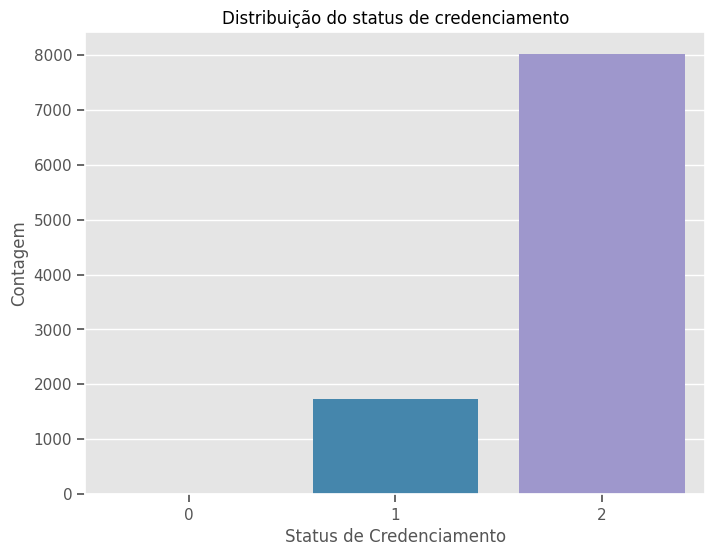

In [25]:
# Estrutura dos dados
#df.info()

# Estatísticas descritivas
#df.describe()

# Verificar valores ausentes
#df.isnull().sum()

# Contagem de cada classe
class_counts = df['statuscredenciamentoid'].value_counts()
class_counts
# Plotagem do gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Distribuição do status de credenciamento')
plt.xlabel('Status de Credenciamento')
plt.ylabel('Contagem')
plt.show()


In [30]:
class_counts
# Definindo a função para mapear os valores
def map_status(status):
    if status == 1:
        return 1  # Deferida
    else:
        return 0  # Não deferida

# Aplicando a função para criar a nova coluna 'status'
df['status'] = df['statuscredenciamentoid'].apply(map_status)

# Verificando a contagem dos valores na nova coluna 'status'
print(df['status'].value_counts())


status
0    8016
1    1734
Name: count, dtype: int64


In [33]:
# Exibir as colunas do DataFrame
print(df.columns)
# Contagem de amostras para cada valor único na coluna 'statuscredenciamentoid'
print(df['statuscredenciamentoid'].value_counts())


Index(['id', 'termosdeclaracaoaceite', 'cnpj', 'nomerazaosocial', 'email',
       'urlsistema', 'nomesistema', 'responsavelcadastronome',
       'responsavelcadastrocpf', 'responsavelcadastroemail',
       'responsavelcadastrotelefone', 'esferafederal', 'esferaestadual',
       'esferamunicipal', 'esferadistrital', 'disponibilizaartefatolicitacao',
       'editalcredenciamento', 'urleditalcredenciamento',
       'avisocontratacaodireta', 'urlavisocontratacaodireta',
       'editallicitacao', 'urleditallicitacao', 'ata', 'urlata', 'contrato',
       'urlcontrato', 'usuarioanaliseprocessoid', 'dataanaliseprocesso',
       'justificativaanalise', 'usuariocredenciadoid', 'datainclusao',
       'excluido', 'sequencialcredenciamento', 'ano', 'statuscredenciamentoid',
       'usuariocredenciadoidnaoprodutivo', 'loginnaoprodutivo'],
      dtype='object')
statuscredenciamentoid
2    8012
1    1734
0       4
Name: count, dtype: int64


In [39]:
from sklearn.preprocessing import OneHotEncoder

# Selecionar apenas as colunas de texto
text_columns = X.select_dtypes(include=['object']).columns

# Aplicar a codificação one-hot
encoder = OneHotEncoder(handle_unknown='ignore')
X_encoded = encoder.fit_transform(X[text_columns])

# Converter de volta para DataFrame e adicionar nomes de colunas
X_encoded = pd.DataFrame(X_encoded.toarray(), columns=encoder.get_feature_names_out(text_columns))

# Adicionar as colunas codificadas ao DataFrame original
X_numeric = X.drop(columns=text_columns)
X_processed = pd.concat([X_numeric, X_encoded], axis=1)

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinar o modelo
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train_scaled, y_train)

# Fazer previsões e avaliar o modelo
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


: 